In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import sinter
from typing import List, Dict, Any
import sys
sys.path.append('..')
from plot_utils import estimate_threshold, plot_stats, plot_stats_bias
%matplotlib inline

In [11]:
# File to load
file = "XZZXArchitecture3Swaps_p10_Waterfall/results.csv"
stats = sinter.read_stats_from_csv_files(file)
etas = [100]#0.5, 1, 10, 100, 1000, 10000]
logical_error_per_round = True

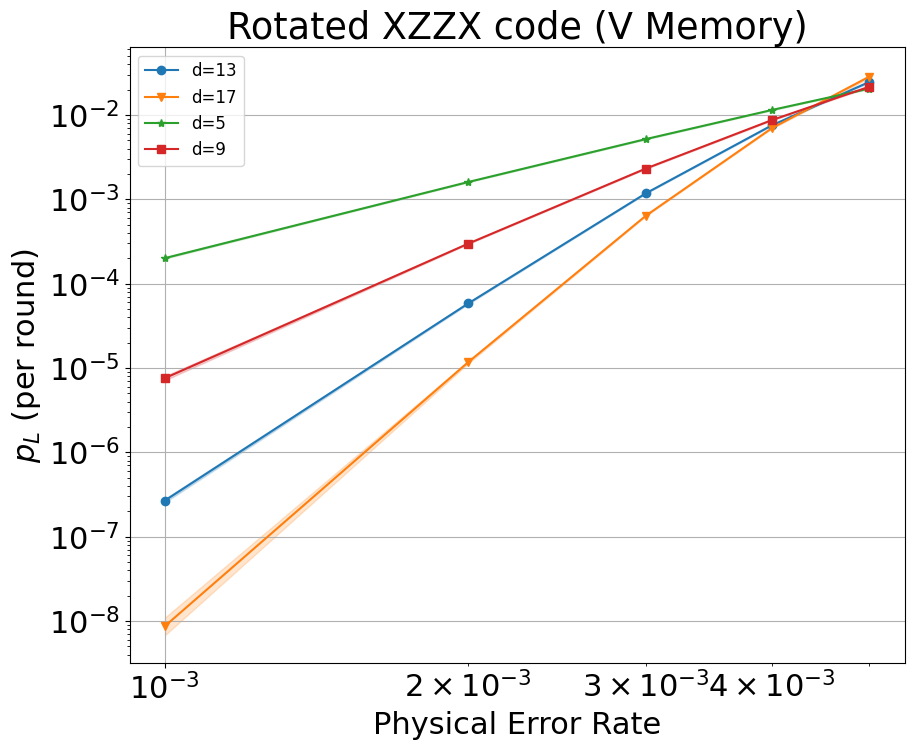

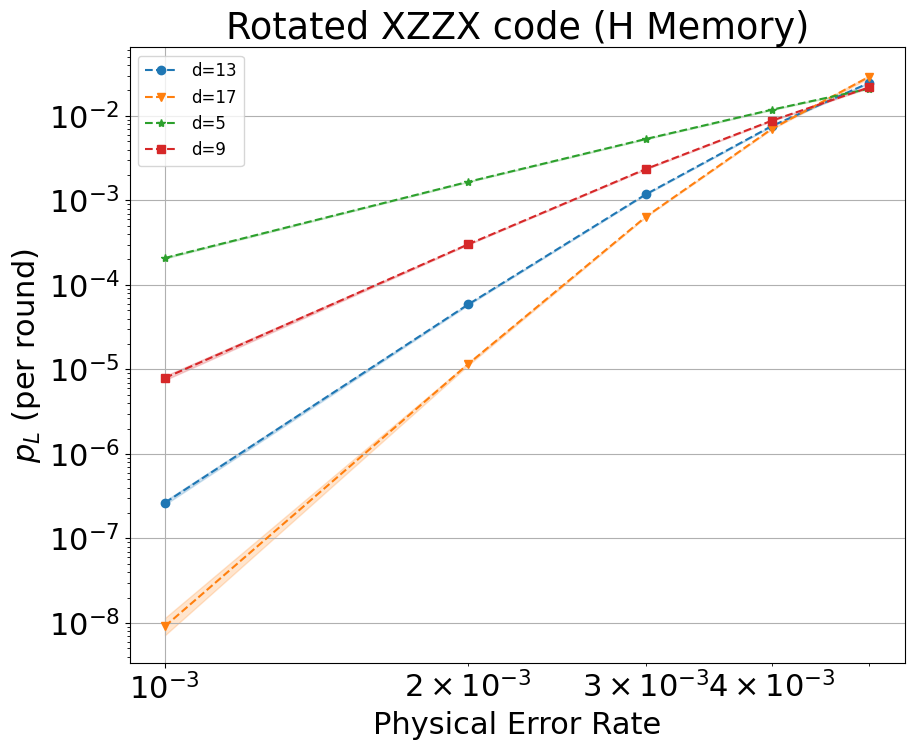

In [12]:
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plot_stats(stats_V, ax=ax, logical_error_per_round=logical_error_per_round)
    ax.set_title(f'Rotated XZZX code (V Memory)')

    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    plot_stats(stats_H, ax=ax, logical_error_per_round=logical_error_per_round)
    ax.set_title(f'Rotated XZZX code (H Memory)')


plt.rcParams.update({'font.size': 20})
    

## Estimate Thresholds

[(0.5, 0.0045, 0.0045), (1, 0.0045, 0.0045), (10, 0.0045, 0.0045), (100, 0.0045, 0.0045), (1000, 0.0045, 0.0045), (10000, 0.0045, 0.0045)]


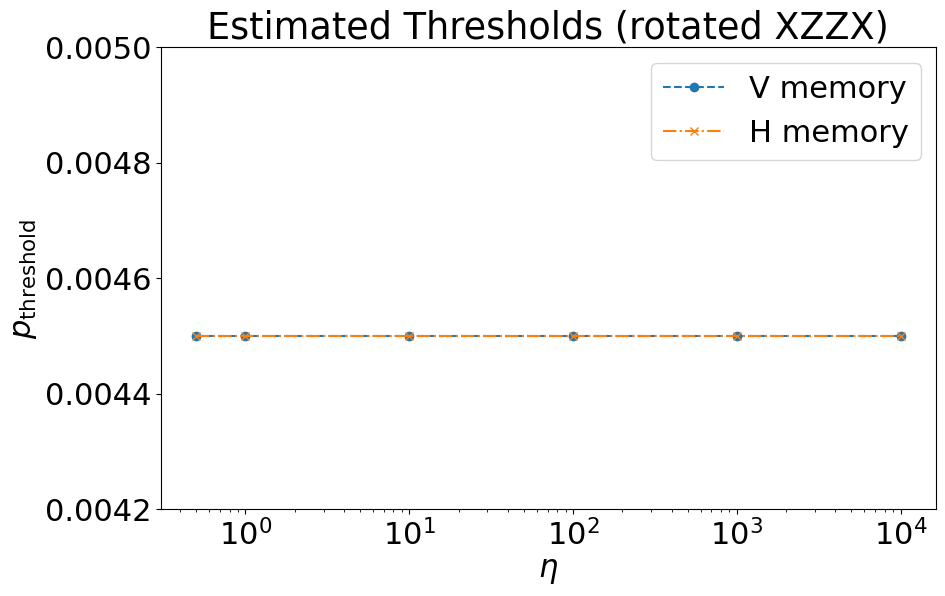

In [10]:
thresholds = []
for eta in etas:
    stats_V = [stat for stat in stats if stat.json_metadata['memory'] == "V" and stat.json_metadata["eta"] == eta]
    stats_H = [stat for stat in stats if stat.json_metadata['memory'] == "H" and stat.json_metadata["eta"] == eta]
    thresholds.append((eta,
                       estimate_threshold(stats_V, logical_error_per_round=logical_error_per_round),
                       estimate_threshold(stats_H, logical_error_per_round=logical_error_per_round)))

print(thresholds)

# Plot the estimated thresholds
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
etas, V_thresholds, H_thresholds = zip(*thresholds)
ax.plot(etas, V_thresholds, "o--", label='V memory')
ax.plot(etas, H_thresholds, "x-.", label='H memory')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_title("Estimated Thresholds (rotated XZZX)")
ax.set_xlabel(r"$\eta$")
ax.set_ylabel(r"$p_\mathrm{threshold}$")
ax.legend()
ax.set_ylim([0.0042, 0.005])
plt.rcParams.update({'font.size': 22})
plt.show()
